In [3]:
import pandas as pd 
stock_data=pd.read_csv('./NFLX.csv',index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-24,370.269989,375.000000,370.200012,371.040009,371.040009,4830200
2019-06-25,370.750000,371.000000,358.290009,360.299988,360.299988,5750400
2019-06-26,361.600006,366.790009,361.600006,362.200012,362.200012,3669700
2019-06-27,363.200012,370.850006,363.200012,370.019989,370.019989,4138600
2019-06-28,370.260010,371.540009,364.869995,367.320007,367.320007,4592700


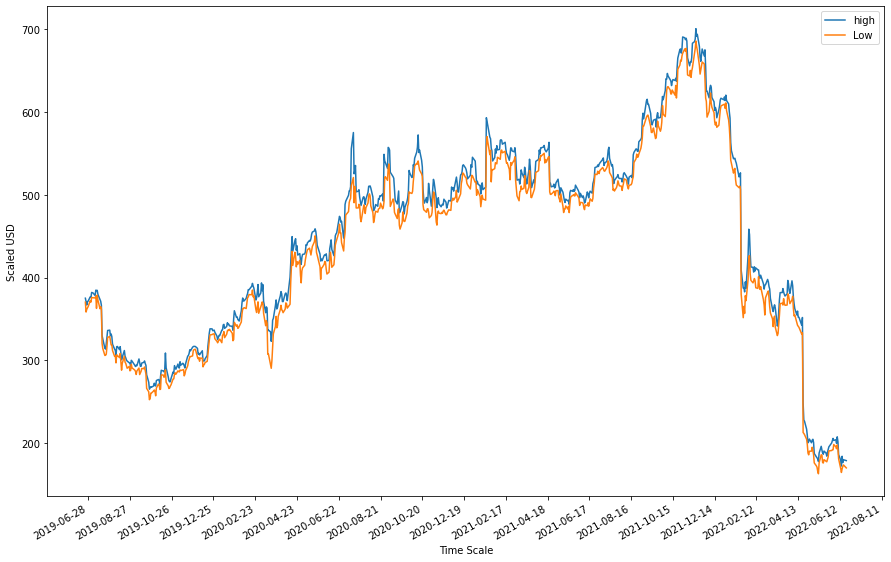

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import datetime as dt 
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]


plt.plot(x_dates,stock_data['High'],label= 'high')
plt.plot(x_dates,stock_data['Low'],label = 'Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [5]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping 

from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error





In [6]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]



In [7]:
#futures Scaling 
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns = X_feat.columns,
                    data = X_ft,
                    index = X_feat.index)


In [8]:
def lstm_split(data,n_steps):
    
  X,y = [] ,[]
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps,:-1])
    y.append(data[i + n_steps-1,-1])
        
  return np.array(X),np.array(y)
            
    

In [9]:
X1, y1 = lstm_split(stock_data.values, n_steps = 2)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index
                
X_train,X_test = X1[:split_idx],X1[split_idx:]
y_train,y_test = y1[:split_idx],y1[split_idx:]
X_train_date,X_test_date = date_index[:split_idx],date_index[split_idx:]
            
    

print(X1.shape,X_train.shape,X_test.shape,y_test.shape)
                
                

(754, 2, 5) (604, 2, 5) (150, 2, 5) (150,)


In [10]:
lstm = Sequential()
lstm.add(LSTM(32,input_shape=(X_train.shape[1],X_train.shape[2]),
              activation ='relu', return_sequences =True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer ='adam')
lstm.summary()

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
history = lstm.fit(X_train,y_train,epochs = 100,batch_size = 4,verbose = 2,shuffle = False)

In [18]:
y_pred = lstm.predict(X_test)

In [20]:
lstm = Sequential()
lstm.add(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2]),
               activation='relu',return_sequences=True))

lstm.add(LSTM(50,activation='relu'))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error',optimizer = 'adam')
lstm.summary()

NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [22]:
n_steps = 10
X1, y1 = lstm_split(stock_data.values, n_steps = n_steps)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data.index
                
X_train,X_test = X1[:split_idx],X1[split_idx:]
y_train,y_test = y1[:split_idx],y1[split_idx:]
X_train_date,X_test_date = date_index[:split_idx],date_index[split_idx:-n_steps]
            
    

print(X1.shape,X_train.shape,X_test.shape,y_test.shape)
                

(746, 10, 5) (597, 10, 5) (149, 10, 5) (149,)
